In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 

from data_generators.standard_generator import StandardDataGenerator
from environments.contextual_environment import ContextualEnvironment
from learners.pricing.contextual_learner import ContextualLearner
from learners.pricing.thompson_sampling import ThompsonSampling
from learners.pricing.ucb import UCB
from utils.context_generator_v2 import ContextGenerator 

In [2]:
src = 'src/basic005.json'

In [3]:
dg = StandardDataGenerator(filename=src)

In [4]:
selected_bid = 4
T = 365
n_experiments = 8
learners_to_test = [ThompsonSampling]
cg_start_from = 150
cg_confidence = 0.2
cg_frequency = 10

features = dg.get_features() 
fractions = dg.get_class_distributions(selected_bid)
bandit_args = {
            'arm_values': dg.get_margins()
}
env_args = {
    'bid_idx': selected_bid,
    'mode': 'all',
    'src': dg.get_source(),
    'generator': 'standard'
}

In [5]:
rewards_per_experiment = {}
context_split_per_experiment = {}
days_of_split = {}
for learner in learners_to_test:
    rewards_per_experiment[learner.LEARNER_NAME] = []
    context_split_per_experiment[learner.LEARNER_NAME] = []
    days_of_split[learner.LEARNER_NAME] = []

In [6]:
for e in range(n_experiments):
    # Initialization of the learners to test and their related environment:
    # the list is composed of tuples (Learner, Environment)
    print(f'\n\nrunning experiment {e + 1}/{n_experiments}...')
    test_instances = []
    
    for learner in learners_to_test:
        context_learner = ContextualLearner(features, learner, **bandit_args)
        test_instances.append(
            (context_learner,
             ContextualEnvironment(**env_args),
             ContextGenerator(features=features,
                              contextual_learner=context_learner,
                              update_frequency=cg_frequency,
                              start_from=cg_start_from,
                              confidence=cg_confidence,
                              verbose=0))
        )
    for t in range(T):
        for context_learner, env, context_generator in test_instances:
            #print(f'##### DAY {t} ######')
            context_learner.next_day()
            past_arms = env.get_selected_arms_at_day(t - 30, keep=False, filter_purchases=True)
            past_features = env.get_collected_user_features_at_day(t - 30, keep=False, filter_purchases=True)
            month_purchases = env.get_next_purchases_at_day(t, keep=True, filter_purchases=True)
            if month_purchases is not None:
                context_learner.update_next_purchases(past_arms, month_purchases, past_features)

            pulled_arms = context_learner.pull_arms()
            daily_rewards = env.day_round(pulled_arms)
            daily_users_features = env.get_collected_user_features_at_day(t)
            daily_pulled_arms = env.get_selected_arms_at_day(t)
            
            context_learner.update(daily_rewards, daily_pulled_arms, daily_users_features)
            context_generator.collect_daily_data(daily_pulled_arms, 
                                                 daily_rewards, 
                                                 daily_users_features,
                                                 next_purchases=month_purchases, 
                                                 past_pulled_arms=past_arms,
                                                 past_features=past_features)
    for learner, _, _ in test_instances:
        learner.next_day()
        rewards_per_experiment[learner.base_learner_class.LEARNER_NAME].append(learner.get_daily_rewards())
        context_split_per_experiment[learner.base_learner_class.LEARNER_NAME].append(learner.get_splits_count())
        days_of_split[learner.base_learner_class.LEARNER_NAME].append(context_generator.metadata['SPLIT_DAYS'])
    
    # end -> save rhe results.



running experiment 1/8...
##### DAY 0 ######
##### DAY 1 ######
##### DAY 2 ######
##### DAY 3 ######
##### DAY 4 ######
##### DAY 5 ######
##### DAY 6 ######
##### DAY 7 ######
##### DAY 8 ######
##### DAY 9 ######
##### DAY 10 ######
##### DAY 11 ######
##### DAY 12 ######
##### DAY 13 ######
##### DAY 14 ######
##### DAY 15 ######
##### DAY 16 ######
##### DAY 17 ######
##### DAY 18 ######
##### DAY 19 ######
##### DAY 20 ######
##### DAY 21 ######
##### DAY 22 ######
##### DAY 23 ######
##### DAY 24 ######
##### DAY 25 ######
##### DAY 26 ######
##### DAY 27 ######
##### DAY 28 ######
##### DAY 29 ######
##### DAY 30 ######
##### DAY 31 ######
##### DAY 32 ######
##### DAY 33 ######
##### DAY 34 ######
##### DAY 35 ######
##### DAY 36 ######
##### DAY 37 ######
##### DAY 38 ######
##### DAY 39 ######
##### DAY 40 ######
##### DAY 41 ######
##### DAY 42 ######
##### DAY 43 ######
##### DAY 44 ######
##### DAY 45 ######
##### DAY 46 ######
##### DAY 47 ######
##### DAY 48 ######
##

##### DAY 33 ######
##### DAY 34 ######
##### DAY 35 ######
##### DAY 36 ######
##### DAY 37 ######
##### DAY 38 ######
##### DAY 39 ######
##### DAY 40 ######
##### DAY 41 ######
##### DAY 42 ######
##### DAY 43 ######
##### DAY 44 ######
##### DAY 45 ######
##### DAY 46 ######
##### DAY 47 ######
##### DAY 48 ######
##### DAY 49 ######
##### DAY 50 ######
##### DAY 51 ######
##### DAY 52 ######
##### DAY 53 ######
##### DAY 54 ######
##### DAY 55 ######
##### DAY 56 ######
##### DAY 57 ######
##### DAY 58 ######
##### DAY 59 ######
##### DAY 60 ######
##### DAY 61 ######
##### DAY 62 ######
##### DAY 63 ######
##### DAY 64 ######
##### DAY 65 ######
##### DAY 66 ######
##### DAY 67 ######
##### DAY 68 ######
##### DAY 69 ######
##### DAY 70 ######
##### DAY 71 ######
##### DAY 72 ######
##### DAY 73 ######
##### DAY 74 ######
##### DAY 75 ######
##### DAY 76 ######
##### DAY 77 ######
##### DAY 78 ######
##### DAY 79 ######
##### DAY 80 ######
##### DAY 81 ######
##### DAY 82 ######


##### DAY 71 ######
##### DAY 72 ######
##### DAY 73 ######
##### DAY 74 ######
##### DAY 75 ######
##### DAY 76 ######
##### DAY 77 ######
##### DAY 78 ######
##### DAY 79 ######
##### DAY 80 ######
##### DAY 81 ######
##### DAY 82 ######
##### DAY 83 ######
##### DAY 84 ######
##### DAY 85 ######
##### DAY 86 ######
##### DAY 87 ######
##### DAY 88 ######
##### DAY 89 ######
##### DAY 90 ######
##### DAY 91 ######
##### DAY 92 ######
##### DAY 93 ######
##### DAY 94 ######
##### DAY 95 ######
##### DAY 96 ######
##### DAY 97 ######
##### DAY 98 ######
##### DAY 99 ######
##### DAY 100 ######
##### DAY 101 ######
##### DAY 102 ######
##### DAY 103 ######
##### DAY 104 ######
##### DAY 105 ######
##### DAY 106 ######
##### DAY 107 ######
##### DAY 108 ######
##### DAY 109 ######
##### DAY 110 ######
##### DAY 111 ######
##### DAY 112 ######
##### DAY 113 ######
##### DAY 114 ######
##### DAY 115 ######
##### DAY 116 ######
##### DAY 117 ######
##### DAY 118 ######
##### DAY 119 ######


##### DAY 103 ######
##### DAY 104 ######
##### DAY 105 ######
##### DAY 106 ######
##### DAY 107 ######
##### DAY 108 ######
##### DAY 109 ######
##### DAY 110 ######
##### DAY 111 ######
##### DAY 112 ######
##### DAY 113 ######
##### DAY 114 ######
##### DAY 115 ######
##### DAY 116 ######
##### DAY 117 ######
##### DAY 118 ######
##### DAY 119 ######
##### DAY 120 ######
##### DAY 121 ######
##### DAY 122 ######
##### DAY 123 ######
##### DAY 124 ######
##### DAY 125 ######
##### DAY 126 ######
##### DAY 127 ######
##### DAY 128 ######
##### DAY 129 ######
##### DAY 130 ######
##### DAY 131 ######
##### DAY 132 ######
##### DAY 133 ######
##### DAY 134 ######
##### DAY 135 ######
##### DAY 136 ######
##### DAY 137 ######
##### DAY 138 ######
##### DAY 139 ######
##### DAY 140 ######
##### DAY 141 ######
##### DAY 142 ######
##### DAY 143 ######
##### DAY 144 ######
##### DAY 145 ######
##### DAY 146 ######
##### DAY 147 ######
##### DAY 148 ######
##### DAY 149 ######
##### DAY 150

##### DAY 142 ######
##### DAY 143 ######
##### DAY 144 ######
##### DAY 145 ######
##### DAY 146 ######
##### DAY 147 ######
##### DAY 148 ######
##### DAY 149 ######
##### DAY 150 ######
##### DAY 151 ######
##### DAY 152 ######
##### DAY 153 ######
##### DAY 154 ######
##### DAY 155 ######
##### DAY 156 ######
##### DAY 157 ######
##### DAY 158 ######
##### DAY 159 ######
##### DAY 160 ######
##### DAY 161 ######
##### DAY 162 ######
##### DAY 163 ######
##### DAY 164 ######
##### DAY 165 ######
##### DAY 166 ######
##### DAY 167 ######
##### DAY 168 ######
##### DAY 169 ######
##### DAY 170 ######
##### DAY 171 ######
##### DAY 172 ######
##### DAY 173 ######
##### DAY 174 ######
##### DAY 175 ######
##### DAY 176 ######
##### DAY 177 ######
##### DAY 178 ######
##### DAY 179 ######
##### DAY 180 ######
##### DAY 181 ######
##### DAY 182 ######
##### DAY 183 ######
##### DAY 184 ######
##### DAY 185 ######
##### DAY 186 ######
##### DAY 187 ######
##### DAY 188 ######
##### DAY 189

##### DAY 181 ######
##### DAY 182 ######
##### DAY 183 ######
##### DAY 184 ######
##### DAY 185 ######
##### DAY 186 ######
##### DAY 187 ######
##### DAY 188 ######
##### DAY 189 ######
##### DAY 190 ######
##### DAY 191 ######
##### DAY 192 ######
##### DAY 193 ######
##### DAY 194 ######
##### DAY 195 ######
##### DAY 196 ######
##### DAY 197 ######
##### DAY 198 ######
##### DAY 199 ######
##### DAY 200 ######
##### DAY 201 ######
##### DAY 202 ######
##### DAY 203 ######
##### DAY 204 ######
##### DAY 205 ######
##### DAY 206 ######
##### DAY 207 ######
##### DAY 208 ######
##### DAY 209 ######
##### DAY 210 ######
##### DAY 211 ######
##### DAY 212 ######
##### DAY 213 ######
##### DAY 214 ######
##### DAY 215 ######
##### DAY 216 ######
##### DAY 217 ######
##### DAY 218 ######
##### DAY 219 ######
##### DAY 220 ######
##### DAY 221 ######
##### DAY 222 ######
##### DAY 223 ######
##### DAY 224 ######
##### DAY 225 ######
##### DAY 226 ######
##### DAY 227 ######
##### DAY 228

##### DAY 211 ######
##### DAY 212 ######
##### DAY 213 ######
##### DAY 214 ######
##### DAY 215 ######
##### DAY 216 ######
##### DAY 217 ######
##### DAY 218 ######
##### DAY 219 ######
##### DAY 220 ######
##### DAY 221 ######
##### DAY 222 ######
##### DAY 223 ######
##### DAY 224 ######
##### DAY 225 ######
##### DAY 226 ######
##### DAY 227 ######
##### DAY 228 ######
##### DAY 229 ######
##### DAY 230 ######
##### DAY 231 ######
##### DAY 232 ######
##### DAY 233 ######
##### DAY 234 ######
##### DAY 235 ######
##### DAY 236 ######
##### DAY 237 ######
##### DAY 238 ######
##### DAY 239 ######
##### DAY 240 ######
##### DAY 241 ######
##### DAY 242 ######
##### DAY 243 ######
##### DAY 244 ######
##### DAY 245 ######
##### DAY 246 ######
##### DAY 247 ######
##### DAY 248 ######
##### DAY 249 ######
##### DAY 250 ######
##### DAY 251 ######
##### DAY 252 ######
##### DAY 253 ######
##### DAY 254 ######
##### DAY 255 ######
##### DAY 256 ######
##### DAY 257 ######
##### DAY 258

##### DAY 242 ######
##### DAY 243 ######
##### DAY 244 ######
##### DAY 245 ######
##### DAY 246 ######
##### DAY 247 ######
##### DAY 248 ######
##### DAY 249 ######
##### DAY 250 ######
##### DAY 251 ######
##### DAY 252 ######
##### DAY 253 ######
##### DAY 254 ######
##### DAY 255 ######
##### DAY 256 ######
##### DAY 257 ######
##### DAY 258 ######
##### DAY 259 ######
##### DAY 260 ######
##### DAY 261 ######
##### DAY 262 ######
##### DAY 263 ######
##### DAY 264 ######
##### DAY 265 ######
##### DAY 266 ######
##### DAY 267 ######
##### DAY 268 ######
##### DAY 269 ######
##### DAY 270 ######
##### DAY 271 ######
##### DAY 272 ######
##### DAY 273 ######
##### DAY 274 ######
##### DAY 275 ######
##### DAY 276 ######
##### DAY 277 ######
##### DAY 278 ######
##### DAY 279 ######
##### DAY 280 ######
##### DAY 281 ######
##### DAY 282 ######
##### DAY 283 ######
##### DAY 284 ######
##### DAY 285 ######
##### DAY 286 ######
##### DAY 287 ######
##### DAY 288 ######
##### DAY 289

In [8]:
margins = dg.get_margins()
classes = dg.get_classes()
conversion_rates = dg.get_conversion_rates(mode='all')
future_purchases = dg.get_future_purchases(mode='all')
number_of_clicks = dg.get_daily_clicks(mode='all')
costs_per_click = dg.get_costs_per_click(mode='aggregate', bid=selected_bid)
fixed_cost = costs_per_click[selected_bid]
fixed_n_clicks = np.rint(dg.get_daily_clicks(mode='aggregate')[selected_bid]).astype(int)
fractions = dg.get_class_distributions(selected_bid)

temp = (margins * np.average(conversion_rates * (1 + future_purchases),
                             axis=0,
                             weights=fractions) - fixed_cost) * fixed_n_clicks
aggr_opt_arm = np.argmax(temp)
aggr_opt = np.max(temp)

disaggr_opt = 0
opt_arms = []
for i, _ in enumerate(conversion_rates):
    t = (margins * conversion_rates[i] * (1 + future_purchases[i]) - fixed_cost) * \
                number_of_clicks[i, selected_bid]
    opt_arm = np.argmax(t)
    opt_value = np.max(t)
    opt_arms.append(opt_arm)
    disaggr_opt += opt_value

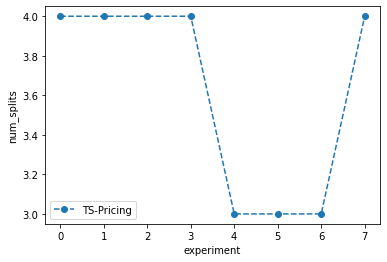

In [9]:
plt.figure()
plt.ylabel("num_splits")
plt.xlabel("experiment")
for val in context_split_per_experiment.values():
    plt.plot(val, '--o')
plt.legend(context_split_per_experiment.keys())
plt.show()

In [10]:
for key in context_split_per_experiment:
    print(f'{key}: avg splits -> {np.mean(context_split_per_experiment[key])}')

TS-Pricing: avg splits -> 3.625


In [11]:
val = days_of_split[ThompsonSampling.LEARNER_NAME]
avg_days = np.mean(val, axis=0)
val, avg_days

/home/filippo/anaconda3/envs/dia-env/lib/python3.8/site-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


TypeError: unsupported operand type(s) for /: 'list' and 'int'

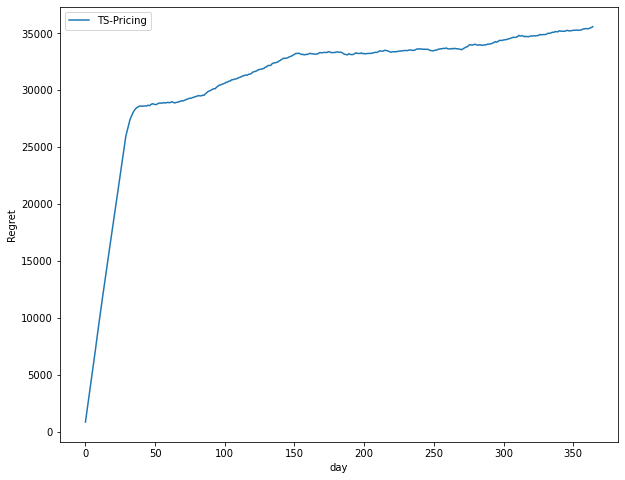

In [12]:
# Plotting the results
plt.figure(figsize=(10,8))
plt.ylabel("Regret")
plt.xlabel("day")
for val in rewards_per_experiment.values():
    plt.plot(np.cumsum(np.mean(disaggr_opt - val, axis=0)))

#plt.axvline(x=cg_start_from, color='r', linestyle='--')
#for val in days_of_split.values():
#    avg_days = np.mean(val, axis=0)
#    for day in avg_days:
#        plt.axvline(x=day, color='m', linestyle='--')

plt.legend(rewards_per_experiment.keys())
plt.show()

/home/filippo/anaconda3/envs/dia-env/lib/python3.8/site-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


TypeError: unsupported operand type(s) for /: 'list' and 'int'

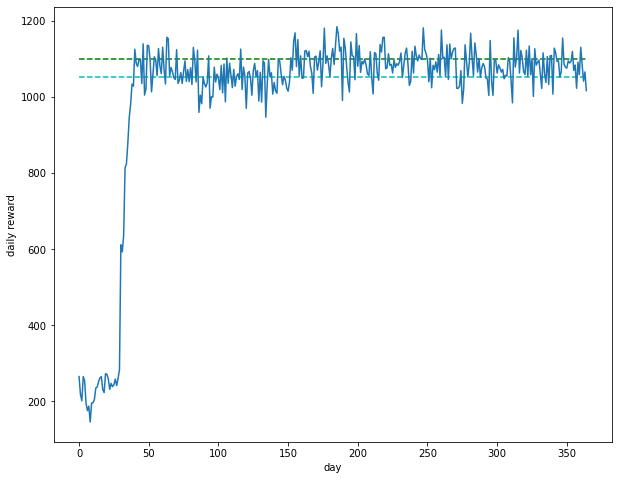

In [13]:
plt.figure(figsize=(10,8))
plt.xlabel("day")
plt.ylabel("daily reward")
plt.plot([disaggr_opt]*T, '--g', label='clairwoyant')
plt.plot([aggr_opt]*T, '--c', label='aggr_clairwoyant')
for key in rewards_per_experiment:
    plt.plot(np.mean(rewards_per_experiment[key], axis=0), label=key)

#plt.axvline(x=cg_start_from, color='r', linestyle='--')
for val in days_of_split.values():
    avg_days = np.mean(val, axis=0)
    for day in avg_days:
        plt.axvline(x=day, color='m', linestyle='--')

plt.legend(loc='best')
plt.show()